In [1]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    make_scorer
)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, cross_val_predict

# Classificazione con feature linguistiche

In questo notebook sarà effettuata una classificazione con le feature linguistiche estratte dai testi. Sono stati usati i 3 dataset:
1) un dataset con le feature linguistiche del testo totale del prompt e del target (quindi considerati unico testo).
2) un dataset con i vettori di feature concatenati, quindi vettore del prompt concatenato al vettore del target.
3) un dataset con i vettori derivati dalla differenza tra il vettore del prompt e quello del target.
4) un dataset con 8 feature, ognuna è la cosine similarity tra le feature del prompt e del target raggruppate per i gruppi di profiling-ud. 

## DATASET 1

In [2]:
# estraggo i dataset già normalizzati
X_train_1 = np.load('../data/_profiled/TED_profiling.npz')['X_train']
y_train_1 = np.load('../data/_profiled/TED_profiling.npz')['y_train']
X_test_1 = np.load('../data/_profiled/TED_profiling.npz')['X_test']
y_test_1 = np.load('../data/_profiled/TED_profiling.npz')['y_test']
feature_names_1 = np.load('../data/_profiled/TED_profiling.npz', allow_pickle=True)['feat_names']

### Model Selection

In [7]:
# cerco gli iperparametri C e max_iter migliori con una 5 fold crossvalidation sul training set.
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=5
    )
gs.fit(X_train_1, y_train_1)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=0.01, dual=True)
{'C': 0.01, 'dual': True, 'max_iter': 1000, 'penalty': 'l2'}
0.5168750000000001


### Test

In [8]:
y_pred = gs.best_estimator_.predict(X_test_1)
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.53      0.51       400
         1.0       0.49      0.46      0.48       400

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.49      0.49       800



### Feature Importances

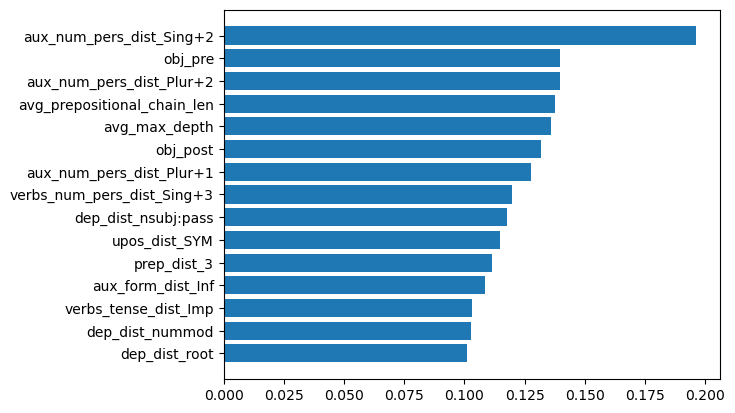

In [5]:
feature_imp1 = gs.best_estimator_.coef_[0]

coef_list1 = sorted([(feature,coef) for feature,coef in zip(feature_names_1, feature_imp1)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list1[:15]])),list(reversed([abs(el[1]) for el in coef_list1[:15]])))
plt.show()

## DATASET 2

In [3]:
# estraggo i dataset già normalizzati
X_train_2 = np.load('../data/_profiled/TED_profiling_concat.npz')['X_train']
y_train_2 = np.load('../data/_profiled/TED_profiling_concat.npz')['y_train']
X_test_2 = np.load('../data/_profiled/TED_profiling_concat.npz')['X_test']
y_test_2 = np.load('../data/_profiled/TED_profiling_concat.npz')['y_test']
feature_names_2 = np.load('../data/_profiled/TED_profiling_concat.npz', allow_pickle=True)['feat_names']

### Model Selection

In [8]:
# cerco gli iperparametri C e max_iter migliori con una 5 fold crossvalidation sul training set.
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=5
    )
gs.fit(X_train_2, y_train_2)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=0.01, dual=True, max_iter=2000)
{'C': 0.01, 'dual': True, 'max_iter': 2000, 'penalty': 'l2'}
0.5145000000000001


### Test

In [9]:
y_pred = gs.best_estimator_.predict(X_test_2)
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.51      0.50       400
         1.0       0.50      0.50      0.50       400

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



### Feature importances

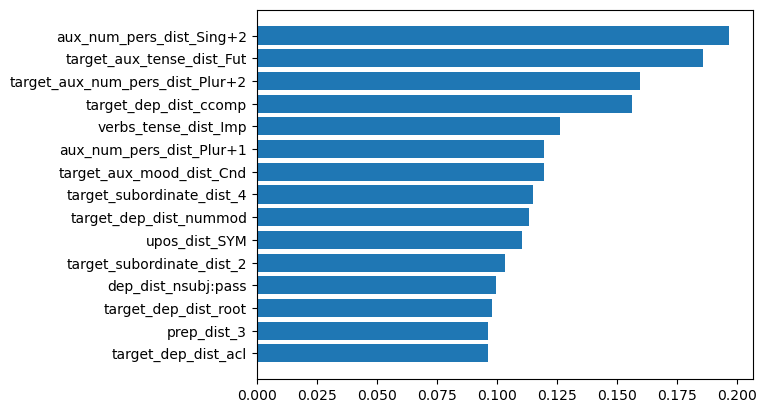

In [10]:
feature_imp2 = gs.best_estimator_.coef_[0]

coef_list2 = sorted([(feature,coef) for feature,coef in zip(feature_names_2, feature_imp2)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list2[:15]])),list(reversed([abs(el[1]) for el in coef_list2[:15]])))
plt.show()

## DATASET 3

In [4]:
X_train_3 = np.load('../data/_profiled/TED_profiling_diff.npz')['X_train']
y_train_3 = np.load('../data/_profiled/TED_profiling_diff.npz')['y_train']
X_test_3 = np.load('../data/_profiled/TED_profiling_diff.npz')['X_test']
y_test_3 = np.load('../data/_profiled/TED_profiling_diff.npz')['y_test']
feature_names_3 = np.load('../data/_profiled/TED_profiling_diff.npz', allow_pickle=True)['feat_names']

### Model Selection

In [10]:
# cerco gli iperparametri C e max_iter migliori con una 5 fold crossvalidation sul training set.
parameters = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=5
    )
gs.fit(X_train_3, y_train_3)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=0.01, dual=True)
{'C': 0.01, 'dual': True, 'max_iter': 1000, 'penalty': 'l2'}
0.508


### Test

In [11]:
y_pred = gs.best_estimator_.predict(X_test_3)
print(classification_report(y_test_3, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53       400
         1.0       0.53      0.53      0.53       400

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



### Feature Importances

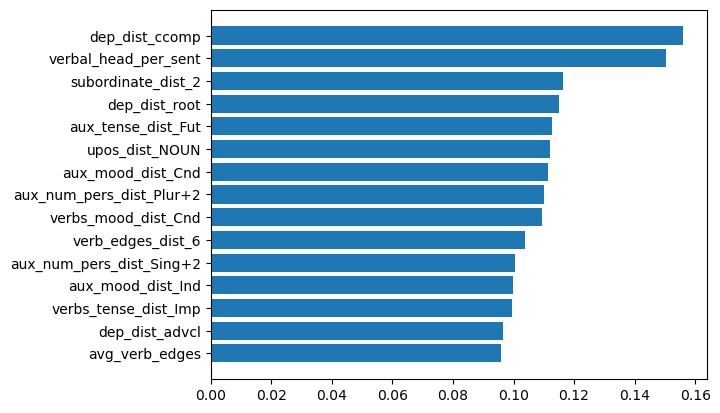

In [12]:
feature_imp3 = gs.best_estimator_.coef_[0]

coef_list3 = sorted([(feature,coef) for feature,coef in zip(feature_names_3, feature_imp3)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list3[:15]])),list(reversed([abs(el[1]) for el in coef_list3[:15]])))
plt.show()

## DATASET 4

In [5]:
X_train_4 = np.load('../data/_profiled/TED_profiling_grouped.npz')['X_train']
y_train_4 = np.load('../data/_profiled/TED_profiling_grouped.npz')['y_train']
X_test_4 = np.load('../data/_profiled/TED_profiling_grouped.npz')['X_test']
y_test_4 = np.load('../data/_profiled/TED_profiling_grouped.npz')['y_test']
feature_names_4 = np.load('../data/_profiled/TED_profiling_grouped.npz', allow_pickle=True)['feat_names']

### Model Selection

In [14]:
# cerco gli iperparametri C e max_iter migliori con una 5 fold crossvalidation sul training set. La bassa dimensionalità del dataset mi permette una ricerca più approfondita
parameters = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],  # Parametro di regolarizzazione
    'penalty': ['l2'],
    'dual': [True],  
    'max_iter': [1000, 2000, 3000],
}

clf = LinearSVC()
gs = GridSearchCV(
    clf, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    cv=5
    )
gs.fit(X_train_4, y_train_4)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

LinearSVC(C=0.01, dual=True)
{'C': 0.01, 'dual': True, 'max_iter': 1000, 'penalty': 'l2'}
0.536375


### Test

In [15]:
y_pred = gs.best_estimator_.predict(X_test_4)
print(classification_report(y_test_4, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.51      0.53       400
         1.0       0.54      0.58      0.56       400

    accuracy                           0.55       800
   macro avg       0.55      0.54      0.54       800
weighted avg       0.55      0.55      0.54       800



### Feature Importances

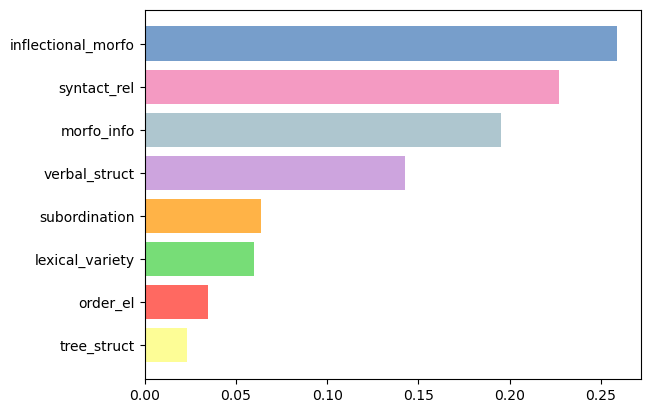

In [19]:
feature_imp4 = gs.best_estimator_.coef_[0]
colors = ['#FDFD96', '#FF6961', '#77DD77', '#FFB347', '#CDA4DE', '#AEC6CF', '#F49AC2', '#779ECB']



coef_list4 = sorted([(feature,coef) for feature,coef in zip(feature_names_4, feature_imp4)], key= lambda x: abs(x[1]), reverse=True)
plt.barh(list(reversed([el[0] for el in coef_list4])),list(reversed([abs(el[1]) for el in coef_list4])), color=colors)
plt.show()

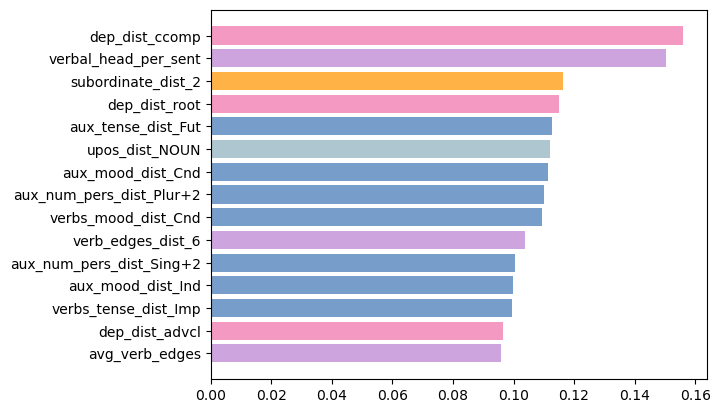

In [20]:
# feature importance del DATASET tre, colorato rispetto a i colori dei gruppi di features del dataset 4
colors1 = list(reversed(['#F49AC2', '#CDA4DE', '#FFB347', '#F49AC2', '#779ECB', '#AEC6CF',
               '#779ECB', '#779ECB', '#779ECB', '#CDA4DE', '#779ECB', '#779ECB',
               '#779ECB', '#F49AC2', '#CDA4DE']))
plt.barh(list(reversed([el[0] for el in coef_list3[:15]])),list(reversed([abs(el[1]) for el in coef_list3[:15]])), color=colors1)
plt.show()